In [1]:
import time
time.sleep(2*3600)

# Workflow for processing Pinnacles - 20MAY18 - Landsat 8

In [2]:
import time
start_time = time.time()

import numpy as np

#
# Set up input and output directories
#
indir = '/g/data1a/u46/users/aw3463/GuyByrne/30APR18/Pinnacles/20MAY18/'
output = '/g/data/u46/users/aw3463/GuyByrne/calval/PNGS/PIN-MultiTimeLine/'

#
# field_data is in the format: 'Field Site Name', 'Date', 'Site number', 'Satellite Name'
# NOTE: Satellite name should be one of: 'Landsat8', 'Sentinel2a', or 'Sentinel2b'.
#
field_data = ['PIN', '20MAY18', '', 'Landsat8', 'GA_Panel', 'Radiance']

#
# bad_pans    contains the names of individual panels readings that appear to be bogus
# bad_grounds contains ground-reading file names that appear to be bogus
# Use empty lists if there are no bad spectra.
#
bad_grounds = []
#bad_pans = ['lkg_l700000.asd.rad', 'lkg_l700001.asd.rad']
bad_pans = []

ls8_bad_days = ['2013-04-20', '2013-05-06', '2013-06-23', '2013-07-09', '2013-08-10', 
                '2013-09-27', '2013-11-30', '2013-12-16', '2014-04-23', 
                '2014-05-09', '2014-05-25', '2014-06-10', '2014-06-26', '2014-08-13', 
                '2014-08-29', '2014-10-16', '2014-12-03', '2015-04-10', '2015-07-31', 
                '2015-08-16', '2015-09-01', '2015-10-03', '2015-10-19', '2015-12-06', 
                '2016-03-27', '2016-04-12', '2016-04-28', '2016-05-14', '2016-07-17', 
                '2016-08-18', '2016-09-19', '2017-02-10', '2017-03-14', '2017-04-15', 
                '2017-06-02', '2017-07-04', '2017-07-20', '2017-08-05', '2017-08-21', 
                '2017-09-06', '2017-09-22', '2017-10-08', '2017-10-24', '2017-12-27', 
                '2018-01-28', '2018-02-13', '2018-03-17', '2018-04-18', '2018-06-05',
                '2018-07-23', '2018-08-08']
s2a_bad_days = ['2015-12-04', '2016-03-03', '2016-04-02', '2016-05-22', '2016-06-21',
                '2016-07-21', '2016-07-31', '2016-08-20', '2016-08-30', '2016-09-09',
                '2016-09-19', '2016-10-09', '2016-10-19', '2016-11-28', '2016-12-28',
                '2017-03-18', '2017-04-07', '2017-04-17', '2017-07-06', '2017-07-26',
                '2017-08-05', '2017-09-14', '2017-09-24', '2017-10-24', '2017-11-03',
                '2017-11-13', '2017-12-03', '2018-03-23', '2018-04-22', '2018-06-01',
                '2018-06-11', '2018-06-21', '2018-07-01']
s2b_bad_days = ['2017-07-01', '2017-07-11', '2017-07-21', '2017-07-31', '2017-08-10',
                '2017-08-20', '2017-08-30', '2017-09-09', '2017-09-19', '2017-10-19',
                '2017-11-08', '2017-11-18', '2017-11-28', '2017-12-18', '2018-01-17',
                '2018-01-27', '2018-02-06', '2018-02-26', '2018-04-07', '2018-04-17',
                '2018-06-06', '2018-06-26', '2018-07-16']

ls8_csvs = ['PIN_02APR18__Landsat8.csv', 'PIN_12APR18__Landsat8.csv', 'PIN_12MAY18__Landsat8.csv',
            'PIN_16JUN18__Landsat8.csv', 'PIN_20MAY18_CSIRO_Landsat8.csv', 'PIN_20MAY18__Landsat8.csv',
            'PIN_22MAY18_CSIRO_Landsat8.csv', 'PIN_22MAY18__Landsat8.csv', 'PIN_28MAR18__Landsat8.csv']
sent_csvs = ['PIN_02APR18__Sentinel2a.csv', 'PIN_12APR18__Sentinel2a.csv', 'PIN_12MAY18__Sentinel2a.csv',
             'PIN_16JUN18__Sentinel2b.csv', 'PIN_20MAY18_CSIRO_Sentinel2a.csv', 'PIN_20MAY18__Sentinel2a.csv',
             'PIN_22MAY18_CSIRO_Sentinel2a.csv', 'PIN_22MAY18__Sentinel2a.csv', 'PIN_28MAR18__Sentinel2b.csv']

rain_dat = 'Weather/PIN.csv'

#
# Define the first line and spectrum number for all/good panels and grounds
#
firstGoodLine = 1
firstGoodPanelSpec = 0
firstGoodGroundSpec = 2

#
# Calculated BRDF data
#
brdf_data = np.array([['', 'brdf0', 'brdf1', 'brdf2'],
                          ['band1', 0.160444, 0.030512, 0.024824000000000002],
                          ['band11', 0.587068, 0.13617200000000002, 0.07799600000000001],
                          ['band12', 0.48186000000000007, 0.090064, 0.078224],
                          ['band2', 0.160444, 0.030512, 0.024824000000000002],
                          ['band3', 0.33585200000000004, 0.081624, 0.058964],
                          ['band4', 0.43227600000000005, 0.094276, 0.07554400000000001],
                          ['band5', 0.43227600000000005, 0.094276, 0.07554400000000001],
                          ['band6', 0.43227600000000005, 0.094276, 0.07554400000000001],
                          ['band7', 0.5422680000000001, 0.156784, 0.06847600000000001],
                          ['band8', 0.5422680000000001, 0.156784, 0.06847600000000001],
                          ['band8a', 0.5422680000000001, 0.156784, 0.06847600000000001],
                         ])

#
# plot_scale defines the extent of the axes in the final two plots in the workflow.
# A scale from 0-1 means no reflectance to perfect reflectance. Typically, dark sites
# will range from 0-0.3, whereas bright sites will be between 0-1.
#
plot_scale = [0.0, 1.0, 0.0, 1.0]

In [3]:
import matplotlib.pyplot as plt
import matplotlib

#
# Astropy is used to determine the Solar angle
#
import astropy.coordinates as coord
from astropy.time import Time
import astropy.units as u

import datacube

from CalVal import *

#
# Use notebook format (allows inline zooming and moving of figures)
# Set default font size for all plots
#
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 12})

In [4]:
#######################################
# LINES BELOW SHOULD REMAIN UNCHANGED #
#######################################
#
# panel_dir and in_panel refer to the file that is used in determining the k-factor,
# so this should remain unchanged.
#
if field_data[5] == 'Radiance':
    suffix = 'asd.rad.txt'
else: 
    suffix = 'asd.txt'

panel_dir =  '/g/data1a/u46/users/aw3463/GuyByrne/30APR18/Panels/'

if field_data[4] == 'GA_Panel':
    in_panel = 'ga_panel1_jan_2018.txt'
elif field_data[4] == 'CSIRO_Panel':
    in_panel = 'csiro_panel.txt'
elif field_data[4] == 'UA_Panel':
    in_panel = 'ua_panel.txt'
elif field_data[4] == 'UOW_Panel':
    in_panel = 'uow_panel.txt'
elif field_data[4] == 'UQ_Panel':
    in_panel = 'uq_panel.txt'
elif field_data[4] == 'CSIRO_VIC_Panel':
    in_panel = 'csiro_vic_panel.txt'
else:
    nopanel = '***PANEL NAME NOT KNOWN***'
    print(nopanel)

#
# Setup for Landsat and Sentinel bandpass filters
#
sat_resp = dict({'Landsat5': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/landsat5_vsir.flt', 
            'Landsat7': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/landsat7_vsir.flt', 
            'Landsat8': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/landsat8_vsir.flt',
            'Sentinel2a': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/Sent2a.flt',
            'Sentinel2b': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/Sent2b.flt'})

f_name = sat_resp[field_data[3]]

#
# Colours used for plotting multi-coloured Lines
#
colpac=['#770000', '#FF0000', '#FF7700', '#FFFF00', '#77FF00', '#00FF00', 
        '#00FF77', '#00FFFF', '#0077FF', '#0000FF', '#000077', '#FF00FF', '#777777', '#770077', '#777700']

#
# Start Figure numbering at 1
#
fignum = 1

#
# Define corners of field data, if GPS coordinates are NOT written into headers.
# Order is SE, SW, NE, NW. Units are decimal degrees.
# If there are no coordinates, then set RockWalk to either True or False.
# True  means that the field site was walked in a rock-like pattern (alternating directions),
# False means that the field site was walked in a roll-like pattern (same direction)
#
Corners = [0, 0, 0, 0, 0, 0, 0, 0]
RockWalk = True
StartCorner = 'SE'

### Define 'alldata' as the dataframe that contains all the raw spectra.
Show the first wavelength of every spectrum, so that the data integrity can be checked.

In [5]:
alldata = LoadData.load_from_dir(indir, suffix, firstGoodLine, Corners)

alldata[alldata['Wavelength']==350]

Wavelength  radiance                filename          date_saved  \
0          350  0.080954  pin_line100000.asd.rad 2018-05-20 02:16:38   
0          350  0.080971  pin_line100001.asd.rad 2018-05-20 02:16:41   
0          350  0.081043  pin_line100002.asd.rad 2018-05-20 02:16:45   
0          350  0.081176  pin_line100003.asd.rad 2018-05-20 02:16:48   
0          350  0.081099  pin_line100004.asd.rad 2018-05-20 02:16:52   
0          350  0.003814  pin_line100005.asd.rad 2018-05-20 02:17:06   
0          350  0.003952  pin_line100006.asd.rad 2018-05-20 02:17:10   
0          350  0.003987  pin_line100007.asd.rad 2018-05-20 02:17:13   
0          350  0.004180  pin_line100008.asd.rad 2018-05-20 02:17:17   
0          350  0.004185  pin_line100009.asd.rad 2018-05-20 02:17:20   
0          350  0.004221  pin_line100010.asd.rad 2018-05-20 02:17:24   
0          350  0.004255  pin_line100011.asd.rad 2018-05-20 02:17:28   
0          350  0.004219  pin_line100012.asd.rad 2018-05-20 02:17:31   
0          350  0.004240  pin_line100013.asd.rad 2018-05-20 02:17:35   
0          350  0.004286  pin_line100014.asd.rad 2018-05-20 02:17:38   
0          350  0.004312  pin_line100015.asd.rad 2018-05-20 02:17:42   
0          350  0.004327  pin_line100016.asd.rad 2018-05-20 02:17:45   
0          350  0.004321  pin_line100017.asd.rad 2018-05-20 02:17:49   
0          350  0.004275  pin_line100018.asd.rad 2018-05-20 02:17:53   
0          350  0.004353  pin_line100019.asd.rad 2018-05-20 02:17:56   
0          350  0.004477  pin_line100020.asd.rad 2018-05-20 02:18:00   
0          350  0.004523  pin_line100021.asd.rad 2018-05-20 02:18:03   
0          350  0.004524  pin_line100022.asd.rad 2018-05-20 02:18:07   
0          350  0.004649  pin_line100023.asd.rad 2018-05-20 02:18:10   
0          350  0.004660  pin_line100024.asd.rad 2018-05-20 02:18:14   
0          350  0.004717  pin_line100025.asd.rad 2018-05-20 02:18:18   
0          350  0.004858  pin_line100026.asd.rad 2018-05-20 02:18:21   
0          350  0.004897  pin_line100027.asd.rad 2018-05-20 02:18:25   
0          350  0.004925  pin_line100028.asd.rad 2018-05-20 02:18:28   
0          350  0.004893  pin_line100029.asd.rad 2018-05-20 02:18:32   
..         ...       ...                     ...                 ...   
0          350  0.004946  pin_line600006.asd.rad 2018-05-20 02:40:55   
0          350  0.005001  pin_line600007.asd.rad 2018-05-20 02:40:59   
0          350  0.004763  pin_line600008.asd.rad 2018-05-20 02:41:03   
0          350  0.004787  pin_line600009.asd.rad 2018-05-20 02:41:06   
0          350  0.005139  pin_line600010.asd.rad 2018-05-20 02:41:10   
0          350  0.005346  pin_line600011.asd.rad 2018-05-20 02:41:14   
0          350  0.005915  pin_line600012.asd.rad 2018-05-20 02:41:17   
0          350  0.005581  pin_line600013.asd.rad 2018-05-20 02:41:21   
0          350  0.005325  pin_line600014.asd.rad 2018-05-20 02:41:24   
0          350  0.005136  pin_line600015.asd.rad 2018-05-20 02:41:28   
0          350  0.005097  pin_line600016.asd.rad 2018-05-20 02:41:31   
0          350  0.005192  pin_line600017.asd.rad 2018-05-20 02:41:35   
0          350  0.005299  pin_line600018.asd.rad 2018-05-20 02:41:39   
0          350  0.005365  pin_line600019.asd.rad 2018-05-20 02:41:42   
0          350  0.005501  pin_line600020.asd.rad 2018-05-20 02:41:46   
0          350  0.005708  pin_line600021.asd.rad 2018-05-20 02:41:49   
0          350  0.005618  pin_line600022.asd.rad 2018-05-20 02:41:53   
0          350  0.005508  pin_line600023.asd.rad 2018-05-20 02:41:57   
0          350  0.005333  pin_line600024.asd.rad 2018-05-20 02:42:00   
0          350  0.005277  pin_line600025.asd.rad 2018-05-20 02:42:04   
0          350  0.005135  pin_line600026.asd.rad 2018-05-20 02:42:08   
0          350  0.004996  pin_line600027.asd.rad 2018-05-20 02:42:11   
0          350  0.004844  pin_line600028.asd.rad 2018-05-20 02:42:18   
0          350  0.004864  pin_line600029.asd

### Print out time stamp and coordinate extent for BRDF correction

The time stamp and Lat/Long extents are required to calculate the BRDF correction, used below.

In order to calculate the BRF correction, the following method is used:

<OL>
    <LI>Run the print statements in the cell below.</LI>
    <LI>Copy and paste the output into a VDI terminal window</LI>
    <LI>Copy and paste the resultant VDI output into the BRDF calculation cell, writing over the similar text.</LI>
</OL>

NOTE: This works assuming that the BRDF code is in the current directory.


In [6]:
PrintBRDF.print_brdf(alldata, field_data)

#################################################################################
# Copy and paste the following into a terminal window on VDI for Landsat 8 data #
#################################################################################

source module.sh
sed -i "34s/.*/        setattr(self, 'acquisition_datetime', dateutil.parser.parse('2018-05-20 02:16:38'))/" retrieve_brdf.py
sed -i "37s/.*/        bbox = geopandas.GeoDataFrame({'geometry': [box(115.155105, -30.585143333333335, 115.15636, -30.58394)]})/" retrieve_brdf.py
python retrieve_brdf.py > temp.txt ; awk -f format_Sent.awk temp.txt



### Specify which spectra are panels/ground/good/bad

 Determine panel file names by assuming that all panels have a data value of at least 0.06
 in the first wavelength (350nm). Call this dataframe 'panel_names'.

 good_panels = all panel data with bad panels removed<BR>
 bad_panels  = all bad panel data<BR>
 all_panels = both good and bad panel data<BR>
 good_grounds = good ground readings<BR>
 all_grounds = all ground data.<P>
 Any bad ground data (bad_grounds) is defined in the 2nd cell.


In [7]:
panel_names, all_panels, good_panels, bad_panels, good_grounds, all_grounds = ExtractPanelsGrounds.extract_panels_grounds(alldata, bad_pans, bad_grounds)

### Create dataframes for all/good/bad panel spectra.

For the bad panel spectra dataframe, first check to see if bad panels have been defined.<BR>
If not, then don't create anything.

In [8]:
all_panel_spec = MakeSpecDF.make_spec_df(all_panels)
good_panel_spec = MakeSpecDF.make_spec_df(good_panels)
try:
    bad_panel_spec = MakeSpecDF.make_spec_df(bad_panels)
except UnboundLocalError:
    pass

# Figure 

### Plot panel radiances for all/good/bad panels

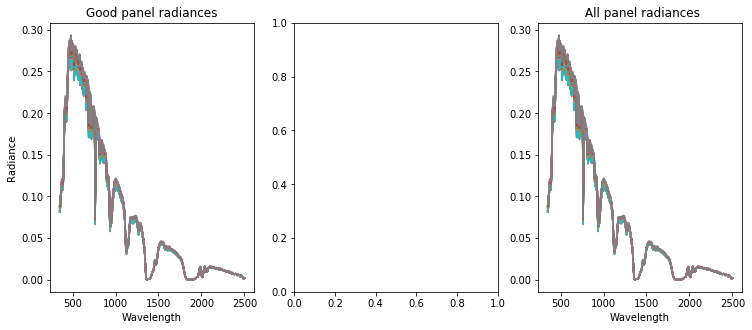

In [9]:
try:
    FIG_PanelRadiances.FIG_panel_radiances(good_panel_spec, bad_panel_spec, all_panel_spec, output, field_data, fignum)
except NameError:
    bad_panel_spec = [0,0]
    FIG_PanelRadiances.FIG_panel_radiances(good_panel_spec, bad_panel_spec, all_panel_spec, output, field_data, fignum)

fignum += 1

# Figure 

### Diagnosis plots of bad panel spectra

In [10]:
good_panel_mean = good_panel_spec.mean(axis=1)

try:
    FIG_BadPanelAnalysis.FIG_bad_panel_analysis(good_panel_mean, good_panel_spec, bad_panel_spec, output, field_data, fignum)
except AttributeError:
    pass
fignum +=1

### Create spectral dataframes for all ground spectra and good ground spectra

In [11]:
all_grounds_spec = MakeSpecDF.make_spec_df(all_grounds)
good_grounds_spec = MakeSpecDF.make_spec_df(good_grounds)

# Figure 

### Plot ground spectra (all and good), normalised to the median good spectrum

These plots are used to identify any ground spectra that are bogus.

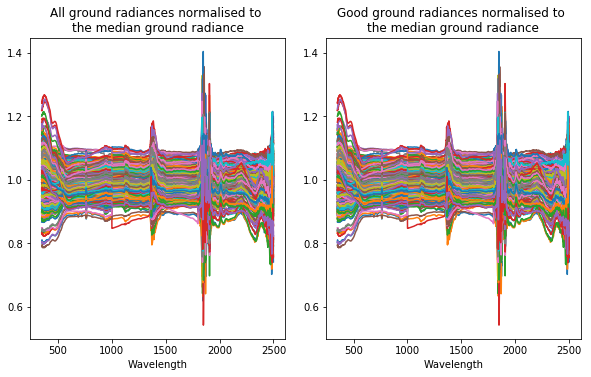

In [12]:
FIG_GroundSpectra.FIG_ground_spectra(good_grounds_spec, all_grounds_spec, output, field_data, fignum)
fignum +=1

### Create time-relative dataframes

gpt = good panels<BR>
gpta = all panels<BR>
adt = good grounds<BR>
adta = all grounds

In [13]:
gpt, gpta, adt, adta = CreateTimeRelativeDF.create_time_relative_dfs(good_panels, all_panels, good_grounds, all_grounds)

# Figure 

### Plot timelines for ALL panel and ground data, with one line in one panel

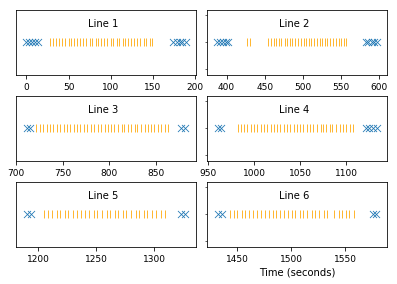

In [14]:
FIG_AllTimelines.FIG_all_timelines(gpta, adta, output, field_data, fignum)
fignum += 1

# Figure 

### Plot timelines for GOOD panel and ground data, with one line in one panel

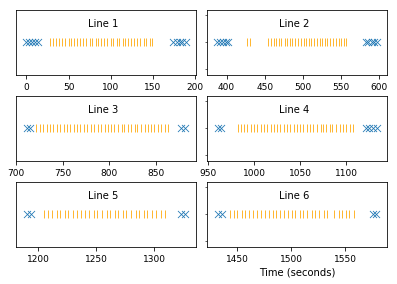

In [15]:
from CalVal.FIG_AllTimelines import panel_plot_layout, multi_timeline_plot

FIG_GoodTimelines.FIG_good_timelines(gpta, gpt, adt, panel_plot_layout, multi_timeline_plot, output, field_data, fignum)
fignum += 1

# Figure 

### Create timeline plot of averaged, normalised all/good panels

These plots are used to identify any panels that show unusually bright or dark readings,<BR>
    which can be weeded out as bad panels.
    
The general shape of the curve should follow "insolation" - the changing of incident light
due to the Sun rising/falling in the sky.

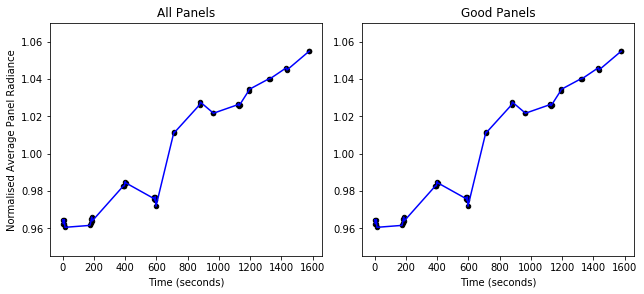

In [16]:
gpt, gpta = FIG_NormalisedPanelsTimeline.normalise_spectra(good_panel_mean, good_panel_spec, all_panel_spec, gpt, gpta)
    
FIG_NormalisedPanelsTimeline.FIG_normalised_panels_timeline(gpt, gpta, output, field_data, fignum)
fignum += 1

### Define the K-factor

This reads a standard file with a response curve for the detector, given an ideally white surface.<BR>
Then "k_f" is defined for the K-factor.

In [17]:
k_f = KFactor.k_factor(panel_dir, in_panel)

### Rename the first spectrum in ALL/GOOD panels to the correct name

Rather than just "radiance", it will be named something like radiance1-0<BR>
for the zeroth spectrum in the first line, for example.    

In [18]:
SpecRename.spec_rename(good_panel_spec, good_grounds_spec, firstGoodLine, firstGoodPanelSpec, firstGoodGroundSpec)

### Create dataframe with Reflectances

In [19]:
all_refls = CreateReflectances.create_reflectances(good_panels, good_panel_spec, good_grounds_spec, k_f)

### Test for reflectances
Test field_data to see if the data were saved as reflectances. If so, bypass all the panelling workflow.

In [20]:
if field_data[5] == 'Reflectance':
    all_refls = good_grounds_spec

# Figure 

### Plot all ground reflectances in black, plus the Line-averaged reflectances in colour

The Line-averaged reflectances are shown in order to identify any outlying lines that<BR>

might have been caused by bad panel spectra (for example).

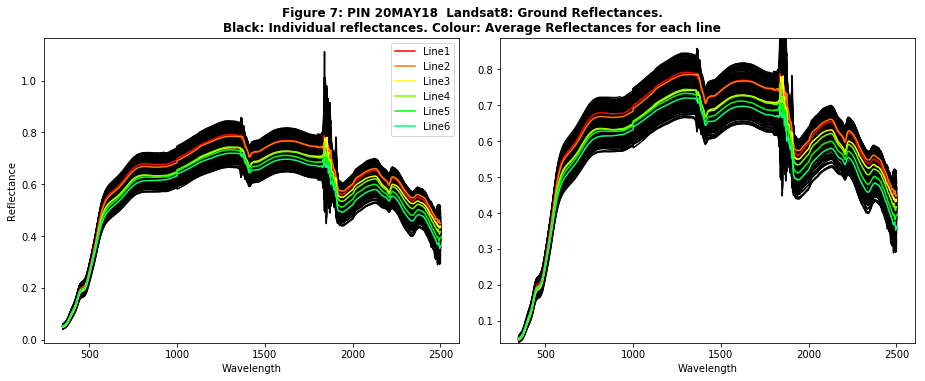

In [21]:
FIG_Reflectances.FIG_reflectances(good_panels, all_refls, colpac, output, field_data, fignum)
fignum += 1

### Apply weighted band responses to all reflectances

In [22]:
f_name = sat_resp['Landsat8']
result_ls8_df, band_ls8 = ApplyWeights.apply_weights(f_name, all_refls)
f_name = sat_resp['Sentinel2a']
result_s2a_df, band_s2a = ApplyWeights.apply_weights(f_name, all_refls)
f_name = sat_resp['Sentinel2b']
result_s2b_df, band_s2b = ApplyWeights.apply_weights(f_name, all_refls)


### Reformat band reflectances and apply to dataframe "ground_bands"

In [23]:
ground_bands_ls8 = ReformatDF.reformat_df(good_grounds, result_ls8_df)
ground_bands_s2a = ReformatDF.reformat_df(good_grounds, result_s2a_df)
ground_bands_s2b = ReformatDF.reformat_df(good_grounds, result_s2b_df)

# Figure 

### Plot band reflectances

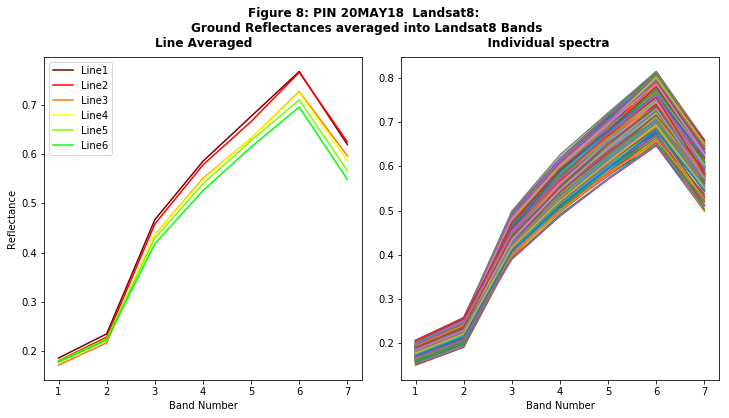

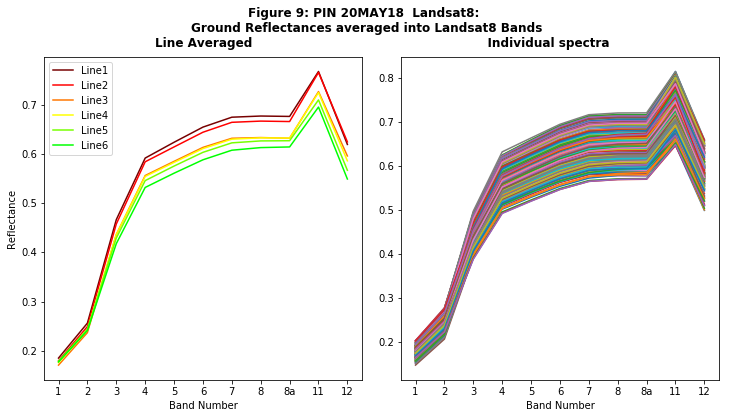

In [24]:
FIG_BandReflectances.FIG_band_reflectances(ground_bands_ls8, result_ls8_df, band_ls8, colpac, output, field_data, fignum)
fignum += 1
FIG_BandReflectances.FIG_band_reflectances(ground_bands_s2a, result_s2a_df, band_s2a, colpac, output, field_data, fignum)
fignum += 1

# Figure

### Histogram of all good spectra, plotted band-by-band

This can be used to identify outlying ground spectra that can be added to bad_grounds in the second cell.

/g/data/v10/public/modules/dea-env/20180728/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

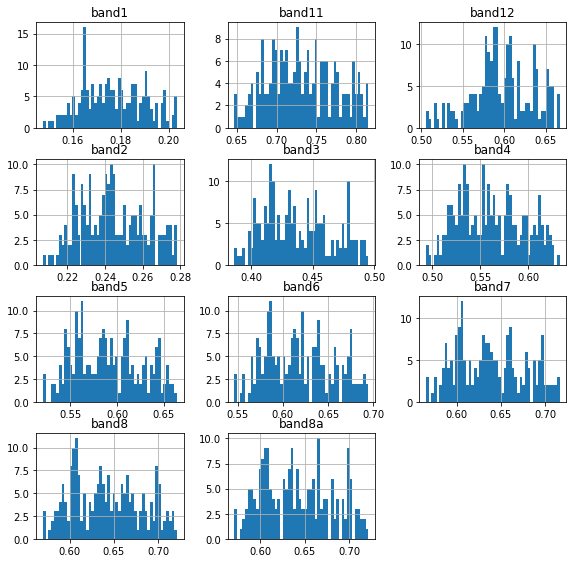

In [25]:
FIG_SpecHistogram.FIG_spec_histogram(ground_bands_s2b, output, field_data, fignum)
fignum += 1

### Outlying ground spectra

Display the spectra with maximum and minimum values. These can be compared to the histograms above<BR>
    to identify any outlying spectra that need to be identified as bad ground spectra.

In [26]:
maxfile = ground_bands_s2b['filename'][(ground_bands_s2b['band1'] == ground_bands_s2b['band1'].max())]
maxbands = ground_bands_s2b.filter(like='band')[(ground_bands_s2b['band1'] == ground_bands_s2b['band1'].max())]
minfile = ground_bands_s2b['filename'][(ground_bands_s2b['band1'] == ground_bands_s2b['band1'].min())]
minbands = ground_bands_s2b.filter(like='band')[(ground_bands_s2b['band1'] == ground_bands_s2b['band1'].min())]

print("Maximum value found in:", maxfile.iloc[0], '\n', maxbands.iloc[0], '\nMinimum value found in:', minfile.iloc[0], '\n', minbands.iloc[0])
#print(ground_bands['filename'][(ground_bands['band1'] == ground_bands['band1'].max())], '\n',ground_bands.filter(like='band')[(ground_bands['band1'] == ground_bands['band1'].max())])
#print(ground_bands['filename'][(ground_bands['band1'] == ground_bands['band1'].min())], '\n',ground_bands.filter(like='band')[(ground_bands['band1'] == ground_bands['band1'].min())])


Maximum value found in: pin_line500022.asd.rad 
 band1     0.203374
band2     0.274505
band3     0.453147
band4     0.575473
band5     0.606878
band6     0.635125
band7     0.656766
band8     0.665795
band8a    0.668864
band11    0.740304
band12    0.573438
Name: 163, dtype: float64 
Minimum value found in: pin_line200035.asd.rad 
 band1     0.147612
band2     0.207018
band3     0.391958
band4     0.512040
band5     0.539116
band6     0.566264
band7     0.584589
band8     0.585998
band8a    0.584194
band11    0.675747
band12    0.565597
Name: 65, dtype: float64


### Determine Solar angle

Based on the spectrum Latitude, Longitude and time stamp, calculate the angle of<BR>
the Sun, with respect to the zenith. Append this number to the "ground_bands" dataframe.

In [27]:
def solar_angle(row):

    loc = coord.EarthLocation(lon=row['Longitude'] * u.deg,
                              lat=row['Latitude'] * u.deg)
    #timy0 = timei.to_pydatetime()
    timy = Time(row['date_saved'], format='datetime')
    
    altaz = coord.AltAz(location=loc, obstime=timy)
    sun = coord.get_sun(timy)

    return sun.transform_to(altaz).zen.degree

ground_bands_ls8['Solar_angle'] = ground_bands_ls8.apply(solar_angle, axis=1)
ground_bands_s2a['Solar_angle'] = ground_bands_s2a.apply(solar_angle, axis=1)
ground_bands_s2b['Solar_angle'] = ground_bands_s2b.apply(solar_angle, axis=1)

### BRDF Calculation

The following script is adapted from FORTRAN code that will calculate the adjusted ASD measurement to 45$^\circ$. This is derived from "MODIS BRDF / Albedo Product: Algorithm Theoretical basis Docuement Version 5.0" by Strahler et al. (1999).

What follows is a key to the variables used in this code, compared to the variables and equations in the document:

hb and br = h/b and b/r . . . . . . . . . . . . . . . crown shape parameters, respectively.<BR>
RL_brdf = R($\theta, \vartheta, \phi, \Lambda$). . . . . . . . . . . . . . (37)<BR>
solar = $\theta$ . . . . . . . . . . . . . . . . . . . . . . . . . . solar zenith angle<BR>
view = $\xi$ . . . . . . . . . . . . . . . . . . . . . . . . . . .view zenith angle<BR>
ra = $\phi$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . view-sun relative azimuth angle<BR>
cosxi = cos $\xi^\prime$ . . . . . . . . . . . . . . . . . . . . . . (43)<BR>
rs_thick = K$_{vol}$ = RossThick kernel . . . . . . (38)<BR>
d_li2 = D$^2$ . . . . . . . . . . . . . . . . . . . . . . . . . (42)<BR>
x_li = tan$\theta^\prime$ tan$\vartheta^\prime$ sin$\phi$ . . . . . . . . . . . . . . .(41) (part of)<BR>
cosl = cos $t$ . . . . . . . . . . . . . . . . . . . . . . . . (41)<BR>
l_li = $t$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . .constrained such that $-1 \leq t \leq 1$<BR>
o_li = O($\theta, \vartheta, \phi$) . . . . . . . . . . . . . . . . . . . .(40)<BR>
li_sparse = K$_{geo}$ . . . . . . . . . . . . . . . . . . . . (39)<BR><BR><BR>

Equations used for the Ross-Li BRDF model:

R($\theta, \vartheta, \phi, \Lambda$) = $f_{iso}(\Lambda) + f_{vol}(\Lambda)\,K_{vol}(\theta, \vartheta, \phi) + f_{geo}(\Lambda)\,K_{geo}(\theta, \vartheta, \phi)$ . . . . . . . . (37)

$K_{vol} = k_{RT} = \frac{(\pi/2 - \xi)\rm{cos}\,\xi + \rm{sin}\,\xi}{\rm{cos}\,\theta + \rm{cos}\,\vartheta} - \frac{\pi}{4}$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . (38)
    
$K_{geo} = k_{LSR} = O(\theta, \vartheta, \phi) - {\rm sec}\,\theta^\prime - {\rm sec}\,\vartheta^\prime + \frac{1}{2} (1 + \rm{cos}\,\xi^\prime)\, \rm{sec}\,\theta^\prime \rm{sec}\,\vartheta^\prime$ . . . (39)

$O = \frac{1}{\pi}(t - \rm{sin}\,t\,\,\rm{cos}\,t)(\rm{sec}\,\theta^\prime + \rm{sec}\,\vartheta^\prime)$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . (40)

$\rm{cos}\,t = \frac{h}{b}\frac{\sqrt{D^2 + (\rm{tan}\,\theta^\prime\,\,\rm{tan}\,\vartheta^\prime\,\,\rm{sin}\,\phi)^2}}{\rm{sec}\,\theta^\prime + \rm{sec}\,\vartheta^\prime}$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . (41)

$D = \sqrt{\rm{tan}^2\,\theta^\prime + \rm{tan}^2\,\vartheta^\prime - 2\,\rm{tan}\,\theta^\prime\,\rm{tan}\,\vartheta^\prime\,\rm{cos}\,\phi}$ . . . . . . . . . . . . . . . . . . . . . . . . . . (42)

$\rm{cos}\,\xi^\prime = \rm{cos}\,\theta^\prime\,\rm{cos}\,\vartheta^\prime + \rm{sin}\,\theta^\prime\,\rm{sin}\,\vartheta^\prime\,\rm{cos}\,\phi$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .(43)

$\theta^\prime = \rm{tan}^{-1}(\frac{b}{r}\rm{tan}\,\theta)\,\vartheta^\prime = \rm{tan}^{-1}(\frac{b}{r}\rm{tan}\,\vartheta)$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .(44)

In [28]:
ground_brdf_ls8, hb, br = BRDF.ReadAndCalc(brdf_data, ground_bands_ls8, ['','','','Landsat8'])
ground_brdf_s2a, hb, br = BRDF.ReadAndCalc(brdf_data, ground_bands_s2a, ['','','','Sentinel2a'])
ground_brdf_s2b, hb, br = BRDF.ReadAndCalc(brdf_data, ground_bands_s2b, ['','','','Sentinel2b'])

### Choose bands for Landsat 8 and Sentinel satellite data

In [29]:
from CalVal.ApplyWeights import get_spectrum_curve

band_nn = get_spectrum_curve(f_name)
senti_bands = [1,2,3,4,5,6,7,8,'8a',11,12]
ls8_bands = [1,2,3,4,5,6,7,8]

if field_data[3] == 'Landsat8':
    band_min = [band_nn['band'+str(i)][:, 0].min() for i in ls8_bands]
    band_max = [band_nn['band'+str(i)][:, 0].max() for i in ls8_bands]

elif field_data[3] == 'Sentinel2a' or field_data[3] == 'Sentinel2b':
    band_min = [band_nn['band'+str(i)][:, 0].min() for i in senti_bands]
    band_max = [band_nn['band'+str(i)][:, 0].max() for i in senti_bands]

else:
    print('Satellite name should be one of Landsat8 or Sentinel. I got', field_data[3])

# Figure 

### Plot satellite band extents against median ground spectrum

This plot will show where the satellite bands fall, with respect to the spectrum<BR>
and in particular, with respect to the atmospheric absorbtion features.

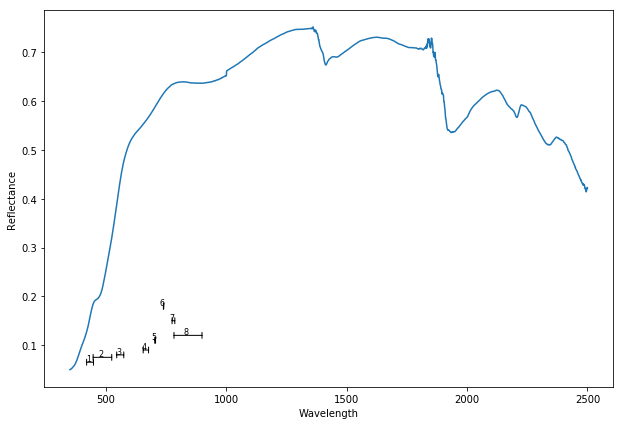

In [30]:
FIG_BandExtents.FIG_band_extents(all_refls, band_min, band_max, output, field_data, fignum)
fignum += 1

### Fudge GPS locations if none exist

In [31]:
ground_brdf_ls8 = FudgeGPS.fudge_gps(ground_brdf_ls8, Corners, RockWalk, StartCorner)
ground_brdf_s2a = FudgeGPS.fudge_gps(ground_brdf_s2a, Corners, RockWalk, StartCorner)
ground_brdf_s2b = FudgeGPS.fudge_gps(ground_brdf_s2b, Corners, RockWalk, StartCorner)

Assuming good GPS Coordinates, continuing...
Assuming good GPS Coordinates, continuing...
Assuming good GPS Coordinates, continuing...


### Query Satellite data

Retrieve xarrays for satellite data, based on which satellite, query area and time.<BR>
sat_array will contain all band data<BR>
sat_bigarray will be a larger version of sat_array, which can be used for context plotting.

In [32]:
ldc, sdc, lquery, squery, lquery2, squery2 = LongQuery.make_long_query(ground_brdf_ls8)

ls8_array, s2a_array, s2b_array, ls8_bigarray, s2a_bigarray, s2b_bigarray = CreateLongArrays.create_long_arrays_nomask(ldc, sdc, lquery, squery, lquery2, squery2)

# Figure 

### Plot relative locations of field and satellite data

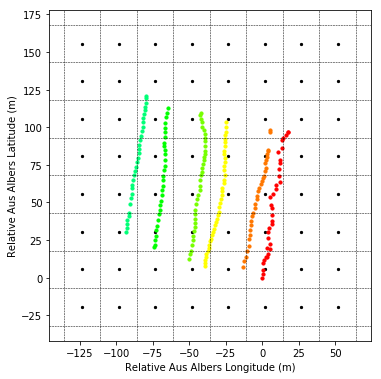

In [33]:
xloc = FIG_SatFieldLocations.FIG_sat_field_locations(ground_brdf_ls8, ls8_array, colpac, output, field_data, fignum)
fignum +=1

### Create Australian albers columns for ground_brdf (not used)

In [34]:
#for i in range(len(ground_brdf)):
#    ground_brdf['Xalbers'], ground_brdf['Yalbers'] = pyproj.transform(wgs_84, aus_albers, ground_brdf['Longitude'][i], ground_brdf['Latitude'][i])
#    
#print(ground_brdf['Xalbers'][4], ground_brdf['Yalbers'][4])
#
#pyproj.transform(wgs_84, aus_albers, ground_brdf['Longitude'][4], ground_brdf['Latitude'][4])

### Create Field full band xarray

The field xarray is based on the pixel locations of the satellite data, where each pixel<BR>
    contains an average of all field data measurements that fall within the pixel.

In [35]:
field_array_ls8, field_array_s2a = CreateManyFieldFromSat.create_many_field_from_sat(ls8_array, s2a_array, ground_brdf_ls8, ground_brdf_s2a, xloc)

# Figure 

### Plot large-area context RGB array for Satellite data

Landsat 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Sentinel 2a


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Sentinel 2b


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

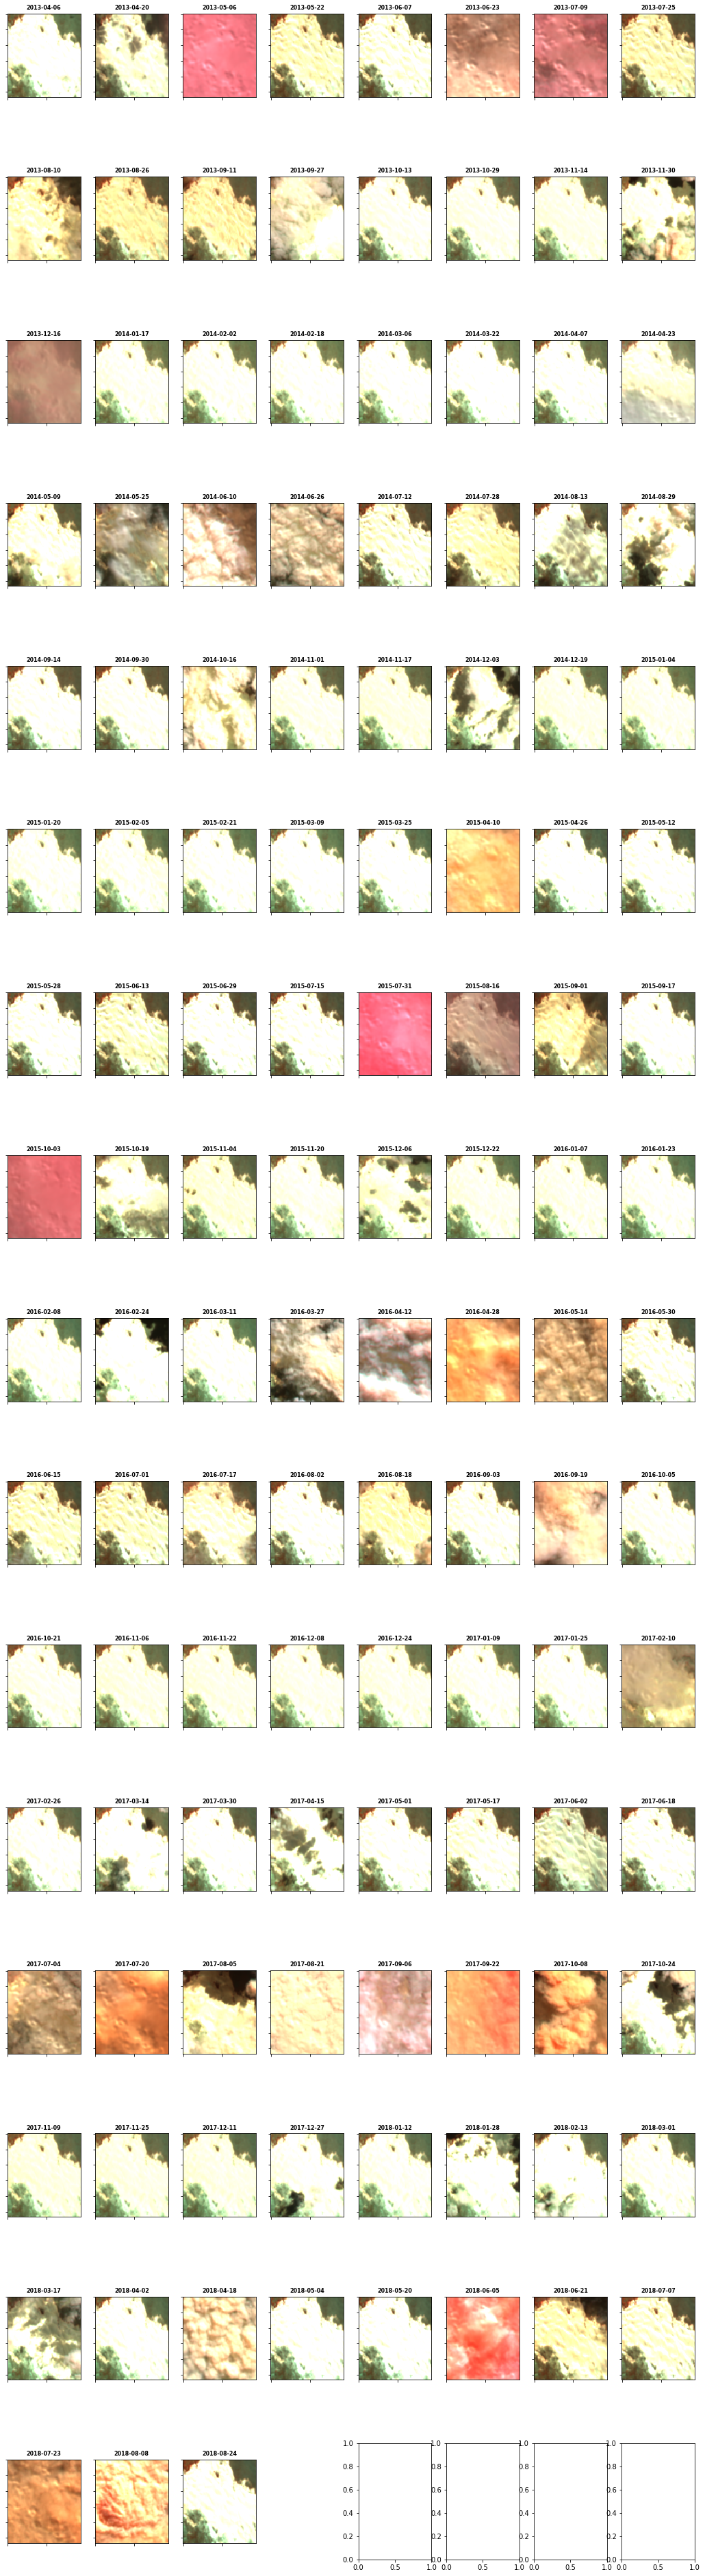

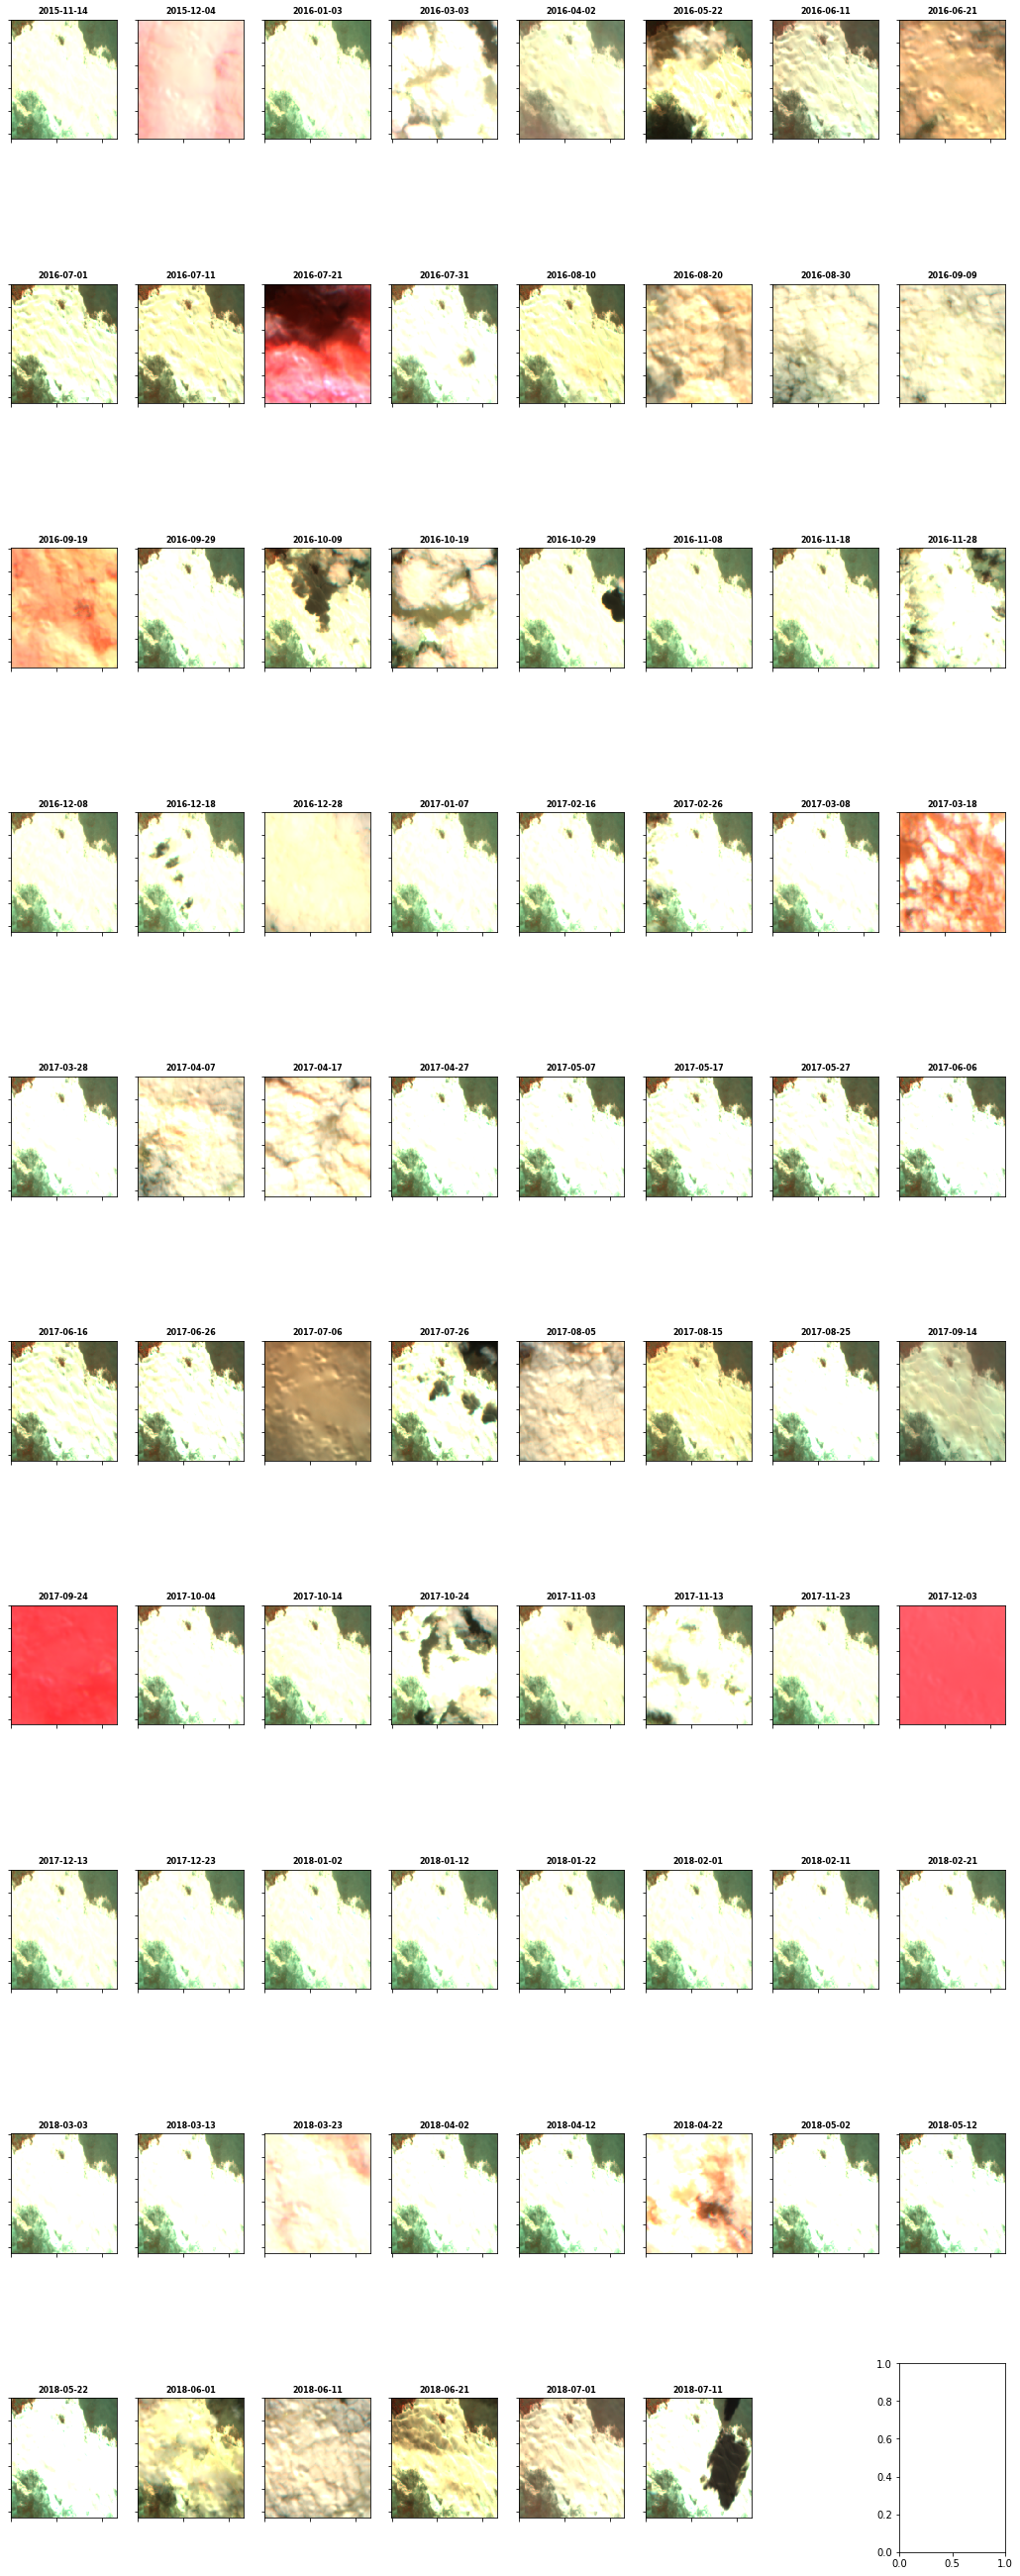

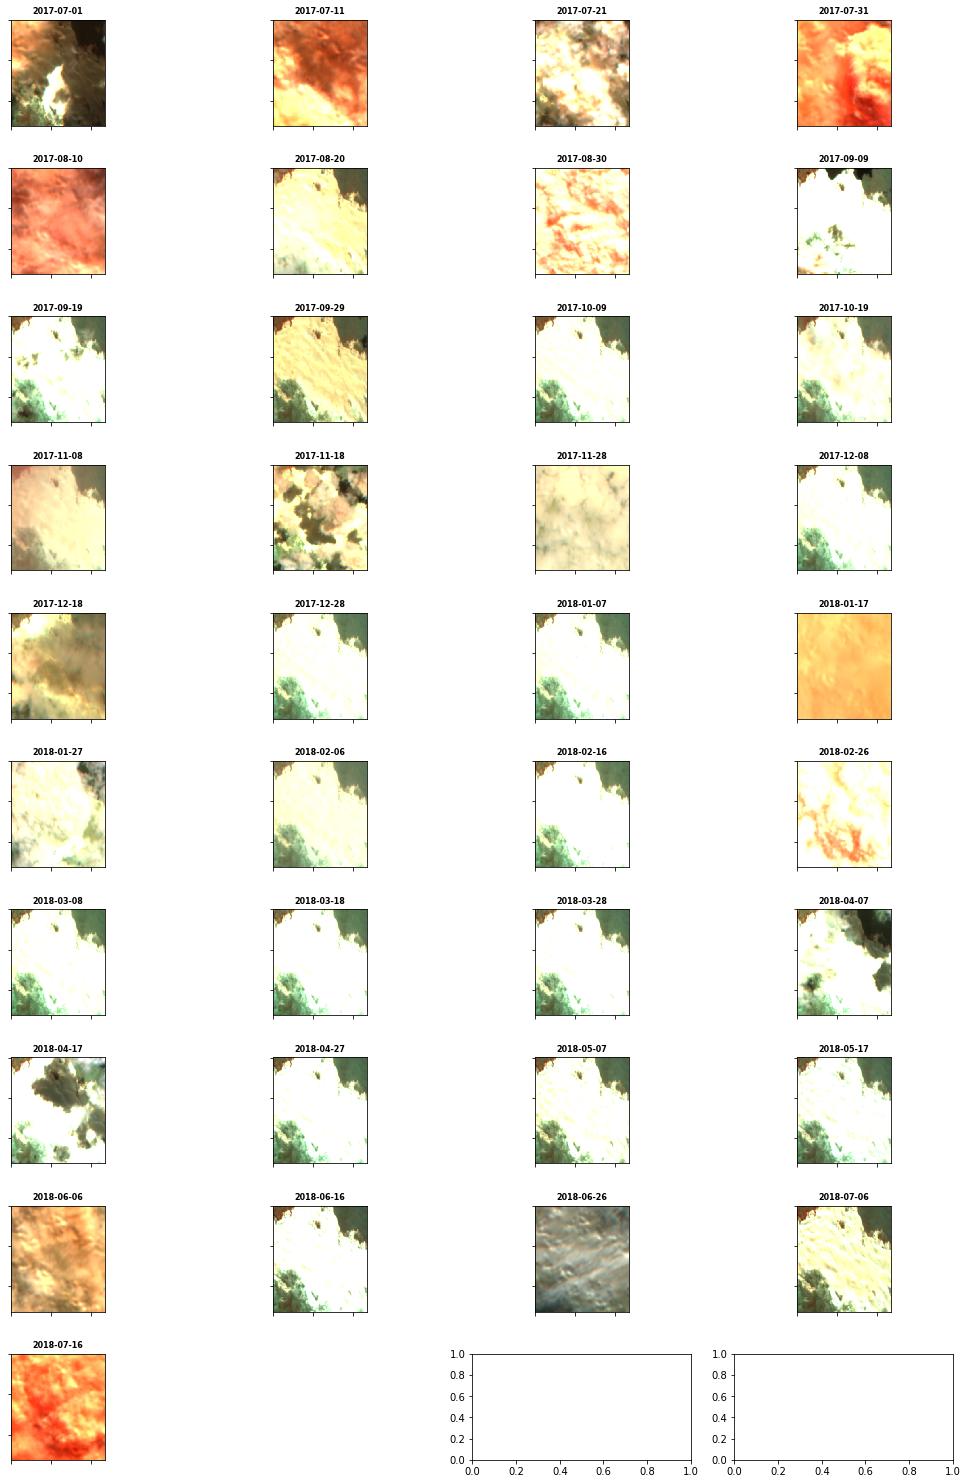

In [36]:
FIG_ManyBigRGB.FIG_many_bigRGB(ls8_array, s2a_array, s2b_array, ls8_bigarray, s2a_bigarray, s2b_bigarray, output, field_data, fignum)
fignum += 1

# Figure 

### Plot RGB array for Satellite data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

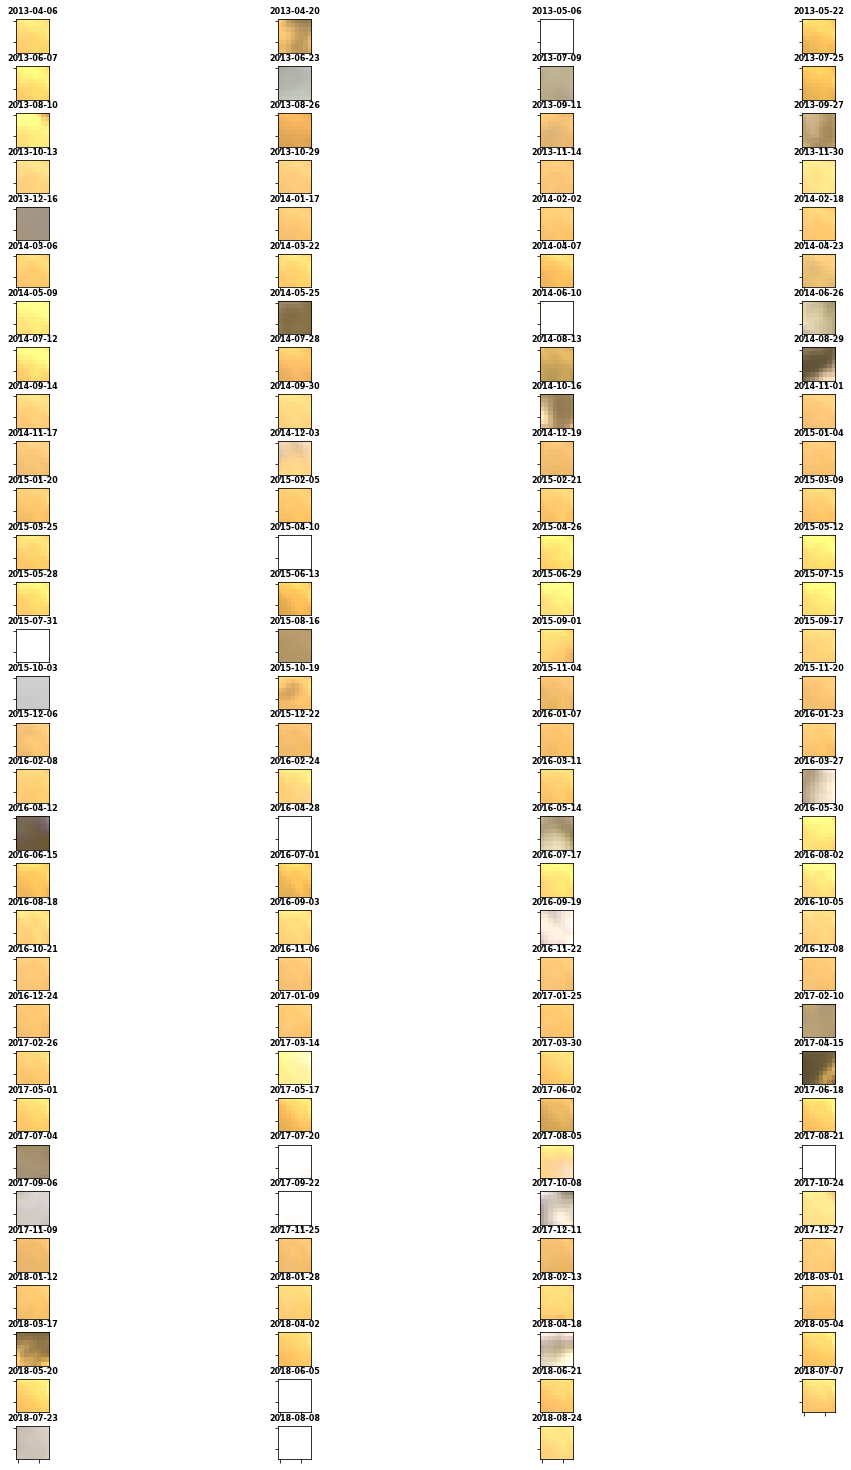

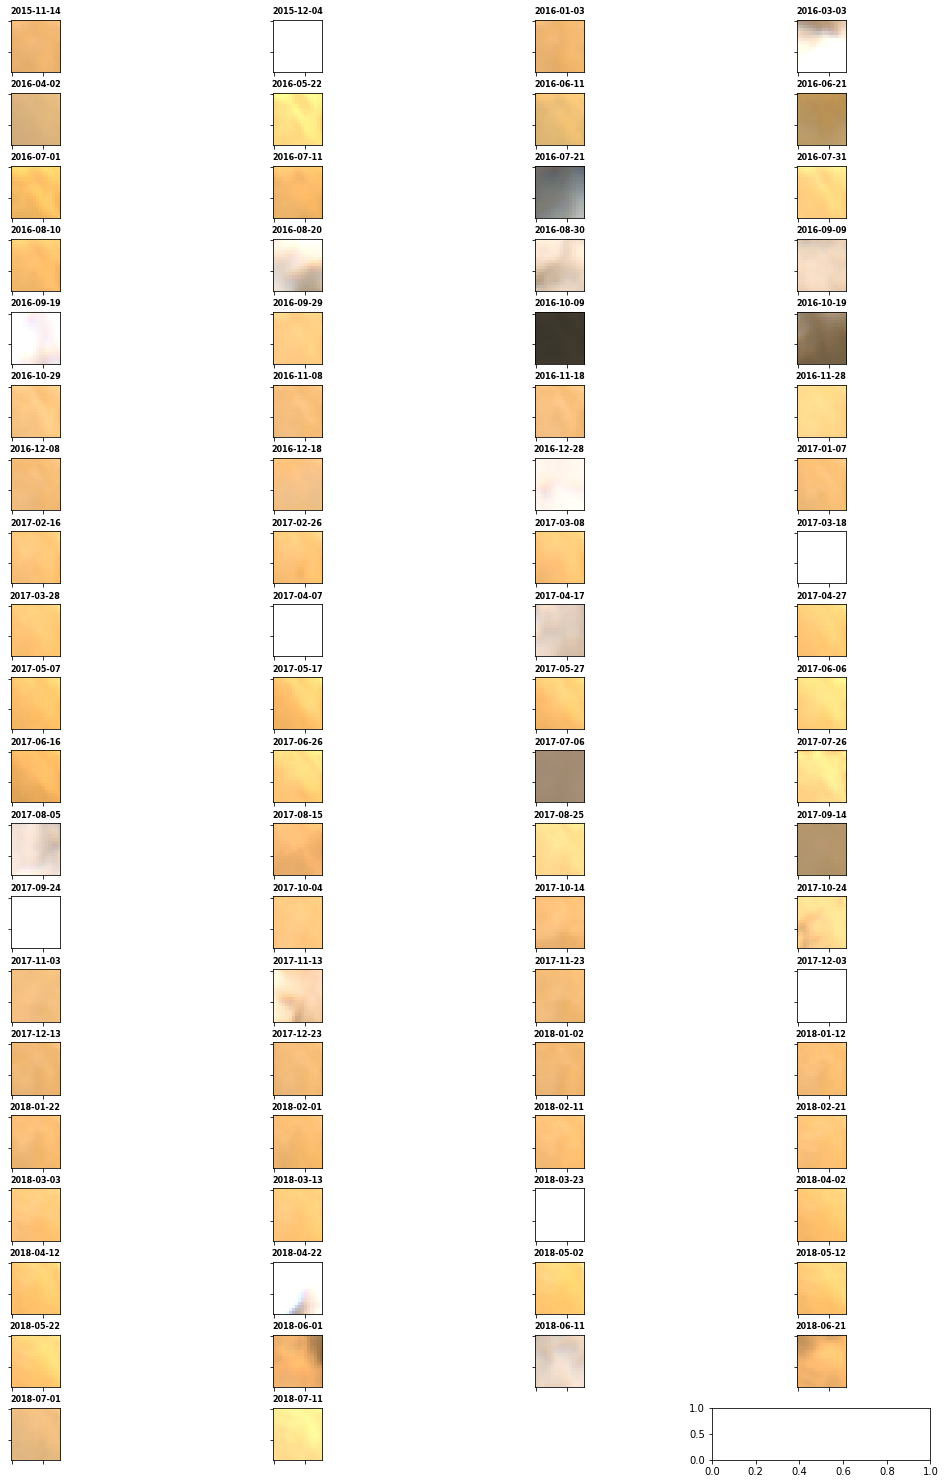

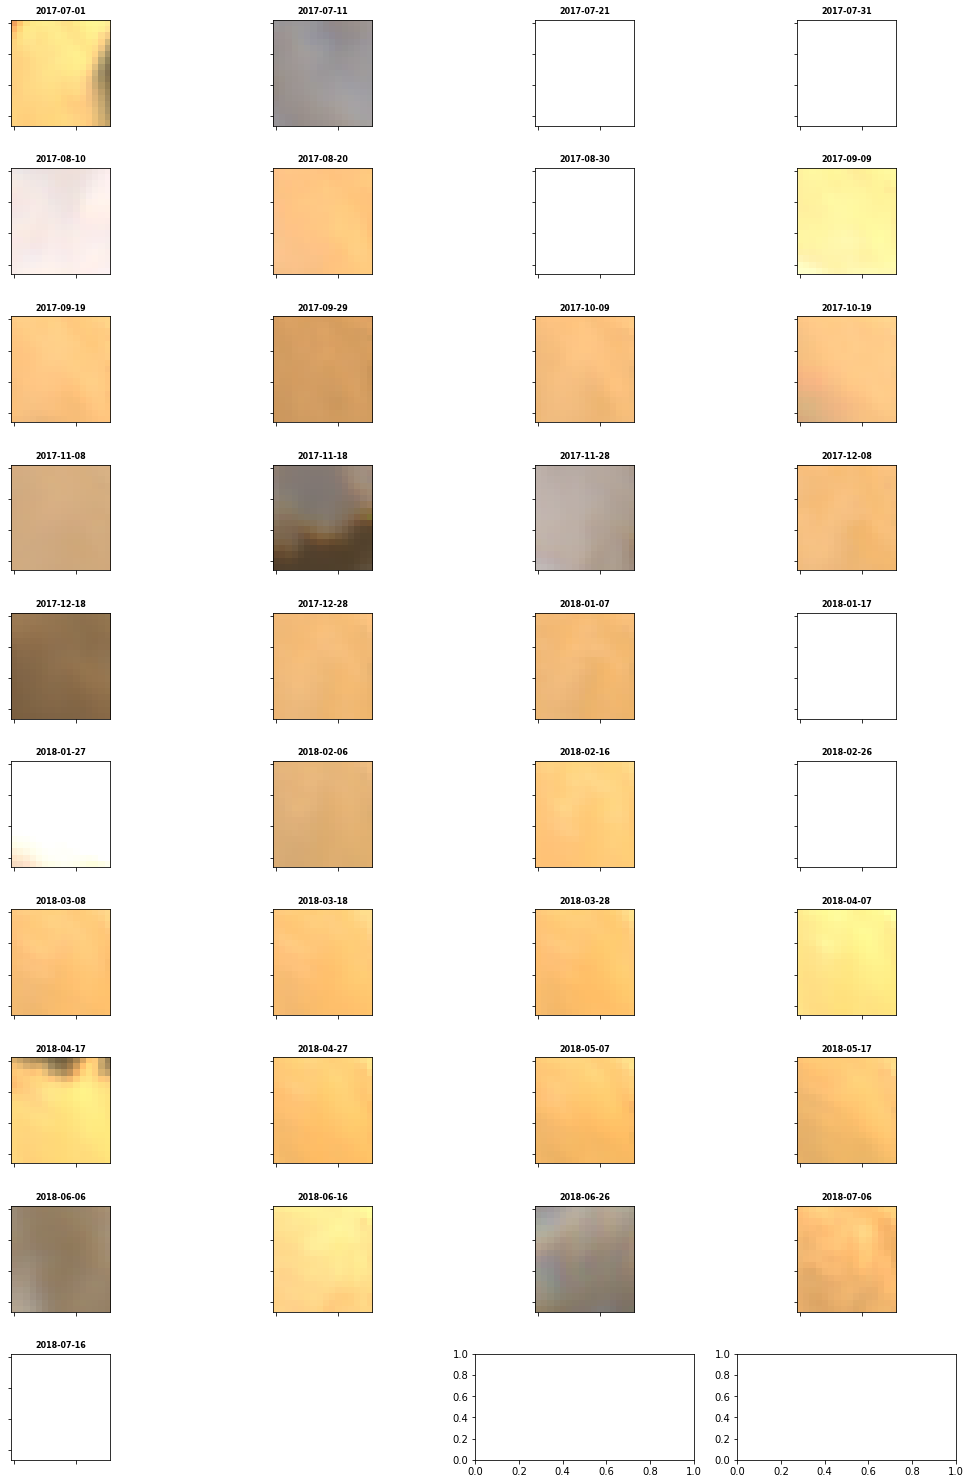

In [37]:
FIG_ManyRGB.FIG_many_RGB(ls8_array, s2a_array, s2b_array, output, field_data, fignum)
fignum += 1

# Figure 

### Plot RGB array for Field data

/g/data/v10/public/modules/dea-env/20180728/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)


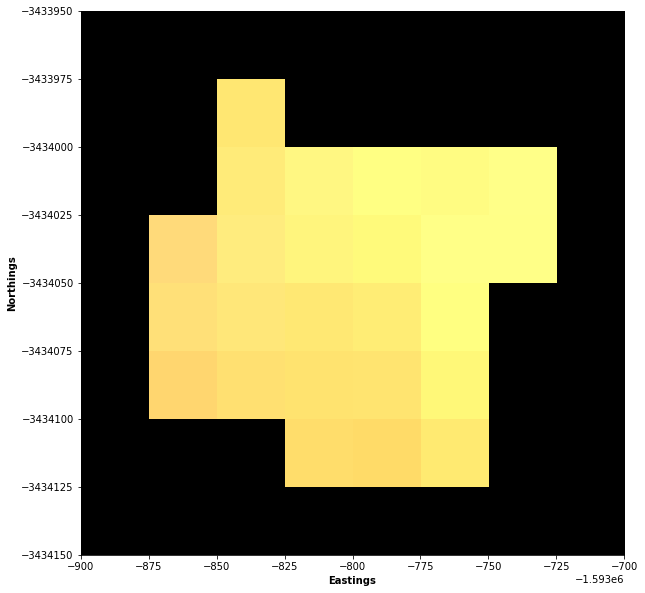

In [38]:
FIG_FieldRGB.FIG_field_RGB(field_array_ls8, output, field_data, fignum)
fignum += 1

# Figure

### Plot ratio arrays for each band

Each panel shows the ratio of satellite/field data.

In [39]:
#FIG_RatioArrays.FIG_ratio_arrays(sat_array, field_array, output, field_data, fignum)
#fignum += 1

### Create a statistics dataframe, comparing satellite and field data

In [40]:
fls8_df, fs2a_df, fs2b_df = CreateManyStats.create_manystats(ls8_array, s2a_array, s2b_array, ls8_bad_days, s2a_bad_days, s2b_bad_days, ground_brdf_ls8, ground_brdf_s2a, field_data)

# Figure

### Plot comparison spectra of satellite and field data, on a pixel-by-pixel basis

Error bars are shown for the satellite and field data, based on the standard deviation of the pixels
within the field. The black line shows the satellite data, which has been averaged over all pixels that satisfy the Datacube query ie. all pixels shown in Figure 11. The orange line shows satellite data which has been averaged over only those pixels that overlap with at least one field measurement.

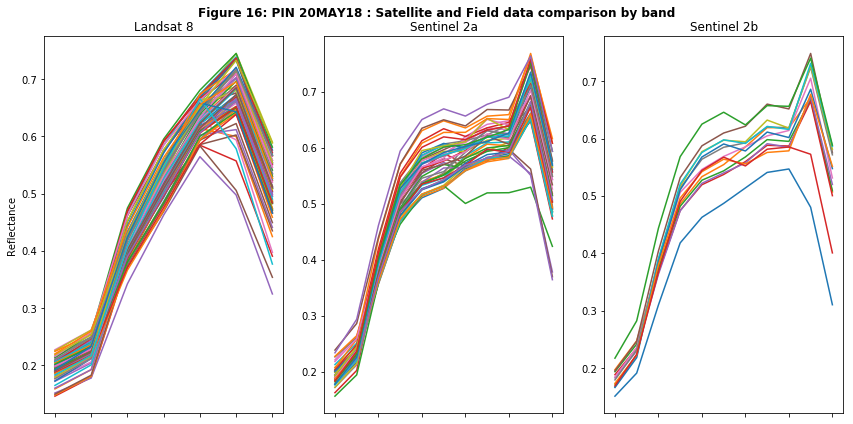

In [41]:
FIG_ManySatFieldBands.FIG_many_sat_field_bands(ls8_array, s2a_array, s2b_array, fls8_df, fs2a_df, fs2b_df, output, field_data, fignum)
fignum += 1

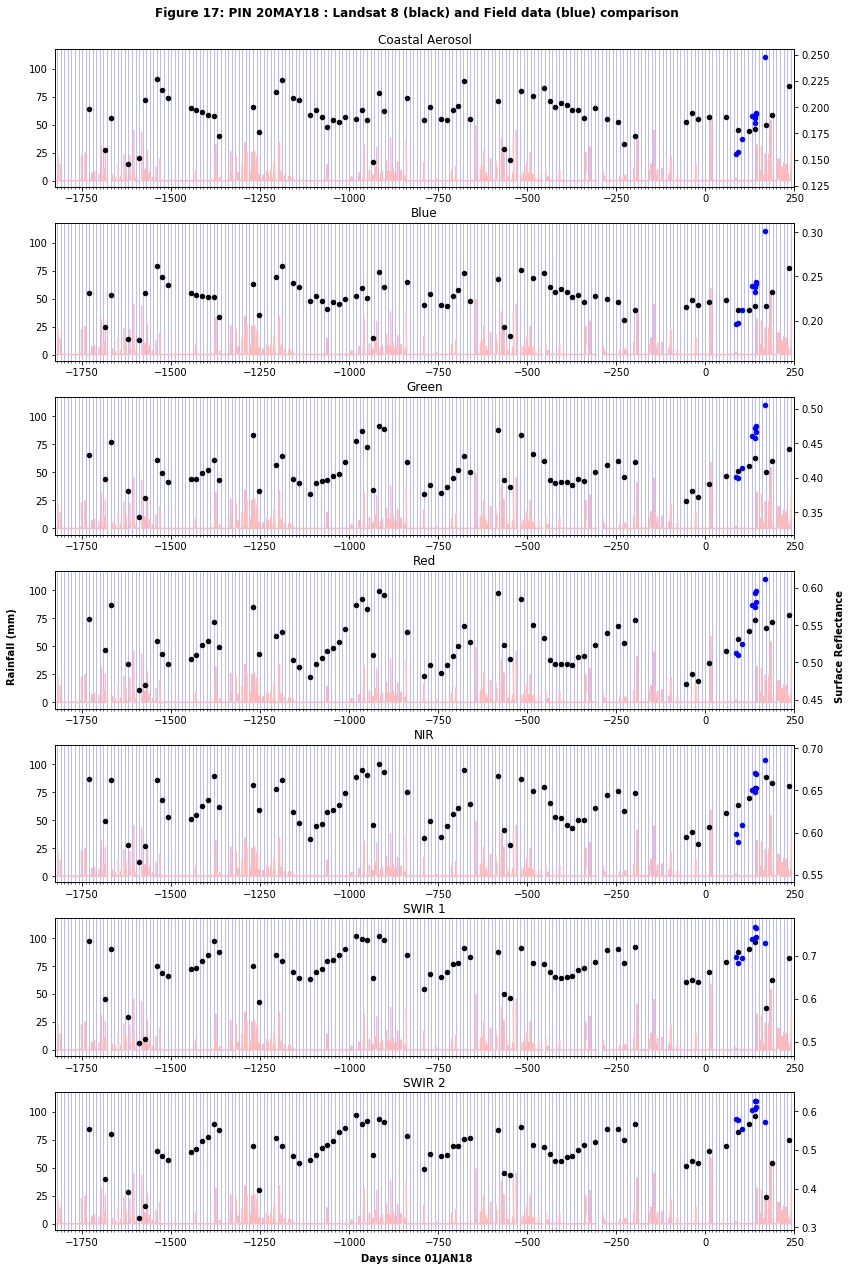

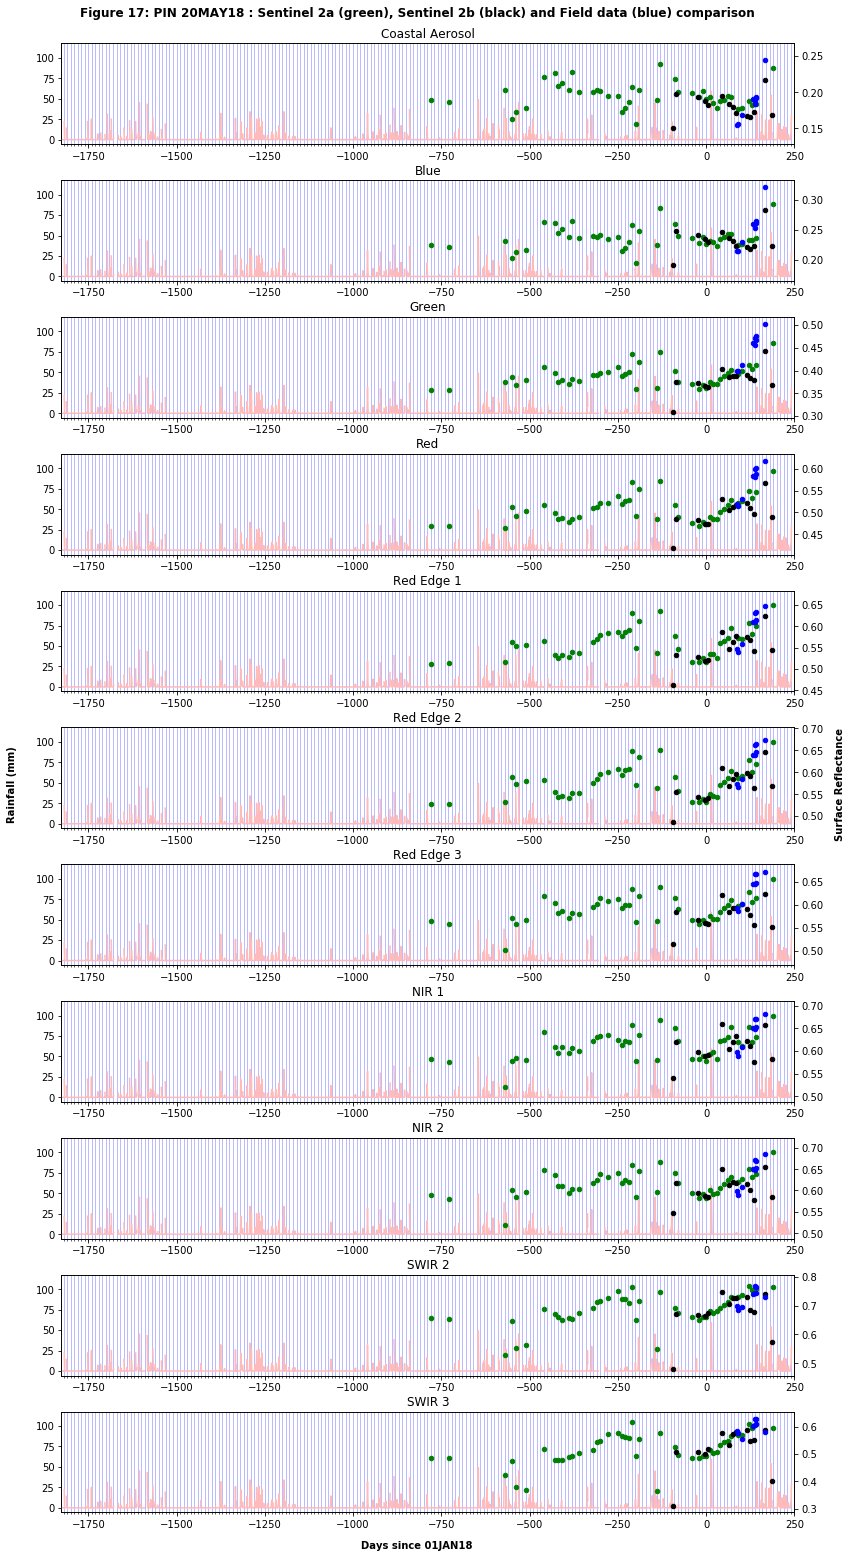

In [42]:
FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
fignum+=1

In [43]:
import importlib
importlib.reload(CalcStats)

<module 'CalVal.CalcStats' from '/g/data1a/u46/users/aw3463/GuyByrne/calval/CalVal/CalcStats.py'>

In [44]:
dd0_ls8, dd1_ls8, dd0_s2a, dd1_s2a, dd0_s2b, dd1_s2b = CalcStats.calc_stats(fls8_df, fs2a_df, fs2b_df, rain_dat)

LANDSAT 8: Number of adjacent overpasses: 72
Landsat 8 Surface Reflectance for Band 1 is 0.194+/-0.02 (10.34%)
Landsat 8 Surface Reflectance for Band 2 is 0.227+/-0.022 (9.78%)
Landsat 8 Surface Reflectance for Band 3 is 0.407+/-0.029 (7.11%)
Landsat 8 Surface Reflectance for Band 4 is 0.521+/-0.027 (5.26%)
Landsat 8 Surface Reflectance for Band 5 is 0.63+/-0.026 (4.06%)
Landsat 8 Surface Reflectance for Band 6 is 0.671+/-0.038 (5.64%)
Landsat 8 Surface Reflectance for Band 7 is 0.501+/-0.042 (8.37%)

SENTINEL 2a: Number of adjacent overpasses: 45
Sentinel 2a Surface Reflectance for Band 1 is 0.191+/-0.02 (10.42%)
Sentinel 2a Surface Reflectance for Band 2 is 0.233+/-0.023 (10.09%)
Sentinel 2a Surface Reflectance for Band 3 is 0.386+/-0.028 (7.26%)
Sentinel 2a Surface Reflectance for Band 4 is 0.507+/-0.029 (5.79%)
Sentinel 2a Surface Reflectance for Band 5 is 0.559+/-0.032 (5.71%)
Sentinel 2a Surface Reflectance for Band 6 is 0.576+/-0.03 (5.27%)
Sentinel 2a Surface Reflectance for Ba

In [45]:
dd0_ls8.to_csv('CSV/TimeStats/PIN_ls8_wetSR.csv')
dd1_ls8.to_csv('CSV/TimeStats/PIN_ls8_wetDiff.csv')
dd0_s2a.to_csv('CSV/TimeStats/PIN_s2a_wetSR.csv')
dd1_s2a.to_csv('CSV/TimeStats/PIN_s2a_wetDiff.csv')
dd0_s2b.to_csv('CSV/TimeStats/PIN_s2b_wetSR.csv')
dd1_s2b.to_csv('CSV/TimeStats/PIN_s2b_wetDiff.csv')


In [46]:
MultiTimeLineDry.multi_time_line_dry(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)

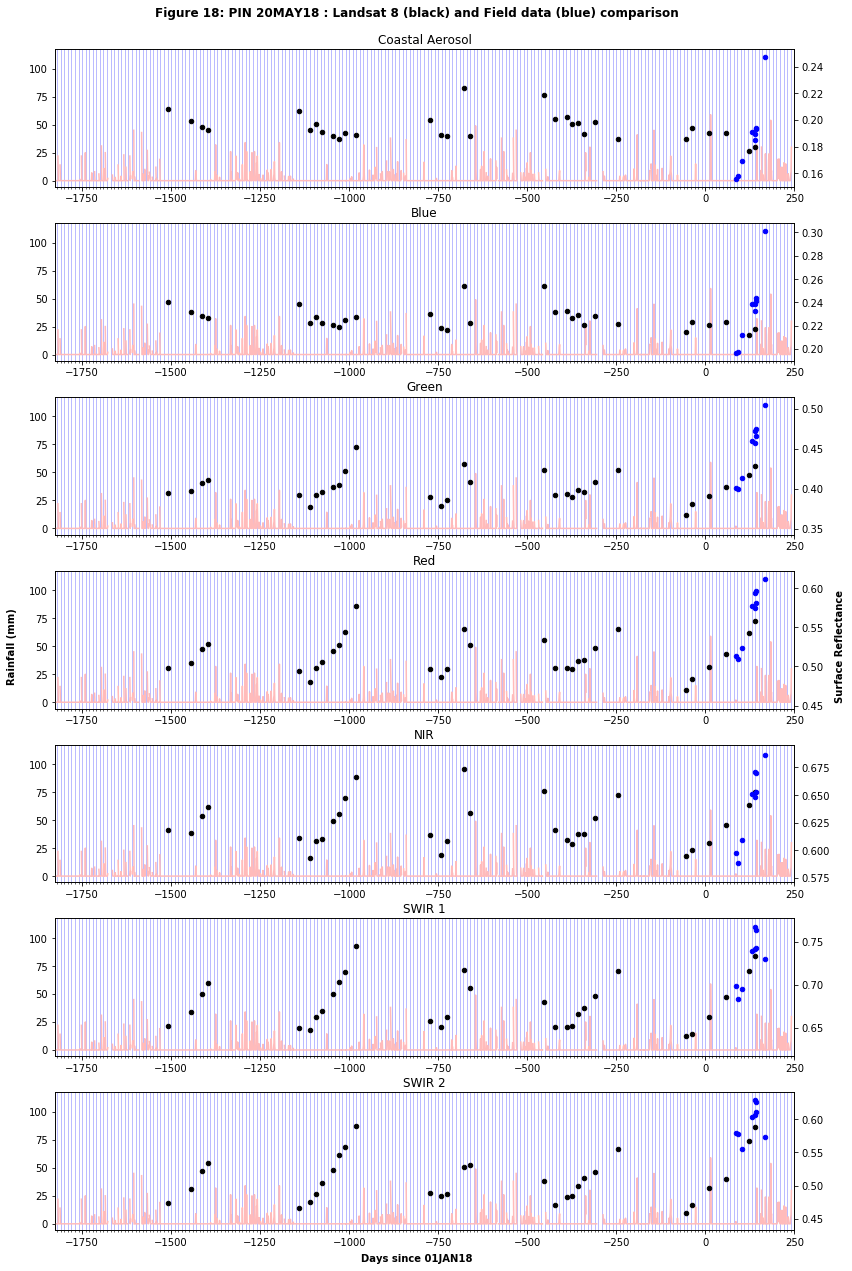

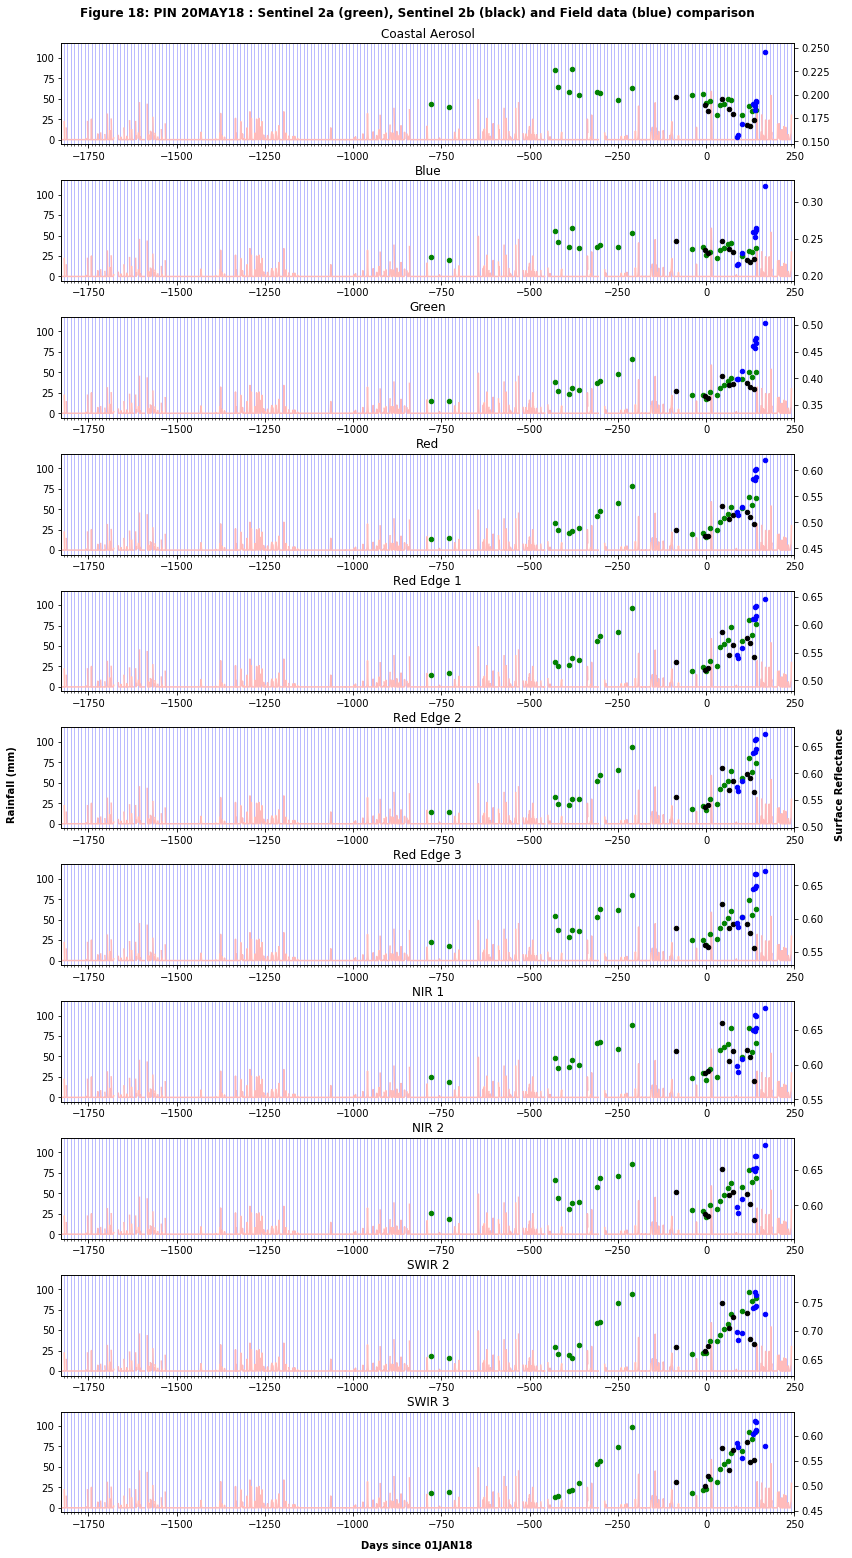

In [47]:
FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
fignum+=1

In [48]:
dd0_ls8, dd1_ls8, dd0_s2a, dd1_s2a, dd0_s2b, dd1_s2b = CalcStats.calc_stats(fls8_df, fs2a_df, fs2b_df, rain_dat)

LANDSAT 8: Number of adjacent overpasses: 31
Landsat 8 Surface Reflectance for Band 1 is 0.194+/-0.011 (5.87%)
Landsat 8 Surface Reflectance for Band 2 is 0.225+/-0.011 (4.69%)
Landsat 8 Surface Reflectance for Band 3 is 0.396+/-0.011 (2.76%)
Landsat 8 Surface Reflectance for Band 4 is 0.508+/-0.011 (2.09%)
Landsat 8 Surface Reflectance for Band 5 is 0.619+/-0.015 (2.4%)
Landsat 8 Surface Reflectance for Band 6 is 0.674+/-0.01 (1.52%)
Landsat 8 Surface Reflectance for Band 7 is 0.505+/-0.007 (1.37%)

SENTINEL 2a: Number of adjacent overpasses: 24
Sentinel 2a Surface Reflectance for Band 1 is 0.195+/-0.011 (5.78%)
Sentinel 2a Surface Reflectance for Band 2 is 0.237+/-0.011 (4.55%)
Sentinel 2a Surface Reflectance for Band 3 is 0.385+/-0.01 (2.62%)
Sentinel 2a Surface Reflectance for Band 4 is 0.503+/-0.011 (2.24%)
Sentinel 2a Surface Reflectance for Band 5 is 0.553+/-0.017 (3.09%)
Sentinel 2a Surface Reflectance for Band 6 is 0.569+/-0.016 (2.79%)
Sentinel 2a Surface Reflectance for Band

In [49]:
dd0_ls8.to_csv('CSV/TimeStats/PIN_ls8_drySR.csv')
dd1_ls8.to_csv('CSV/TimeStats/PIN_ls8_dryDiff.csv')
dd0_s2a.to_csv('CSV/TimeStats/PIN_s2a_drySR.csv')
dd1_s2a.to_csv('CSV/TimeStats/PIN_s2a_dryDiff.csv')
dd0_s2b.to_csv('CSV/TimeStats/PIN_s2b_drySR.csv')
dd1_s2b.to_csv('CSV/TimeStats/PIN_s2b_dryDiff.csv')


## How long did this notebook take to run?

In [50]:
import datetime
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to run")

This Notebook took  0:16:59 (h:m:s) to run
